# Task 5 Exploratory Data Analysis - Sports
### Author : Viraj patel

__find out the most successful teams, players and factors contributing for win or loss of a team__

__Suggest teams or players a company should endorse for its products__ 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load Match Data

In [2]:
match=pd.read_csv('matches.csv')
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#Information about data and it's type
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

__Here I am drop the values of the umpire 3 because there is lost of null values and it's also not much important for the analysis__

In [5]:
match.drop(['umpire3'],axis=1).head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [6]:
#team name
d={'name':match.team1.unique()}
pd.DataFrame(d,columns=['name'])

,name
0,Sunrisers Hyderabad
1,Mumbai Indians
2,Gujarat Lions
3,Rising Pune Supergiant
4,Royal Challengers Bangalore
5,Kolkata Knight Riders
6,Delhi Daredevils
7,Kings XI Punjab
8,Chennai Super Kings
9,Rajasthan Royals


## Win Toss

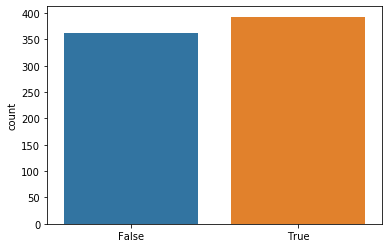

In [7]:
sns.countplot(match.toss_winner == match.winner)
plt.show()

__From above graph say that wining the toss is not too much affect to win the match__

## Decision After Winning toss

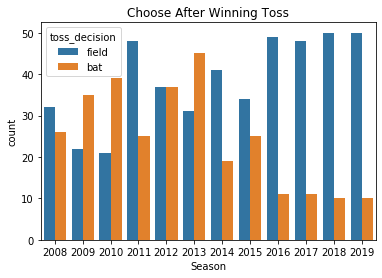

In [8]:
#chose after winnig toss every season 
sns.countplot(match['season'].values,hue=match['toss_decision'])
plt.title("Choose After Winning Toss")
plt.xlabel('Season')
plt.ylabel('count')
plt.show()

## Best target chasing team in the IPL

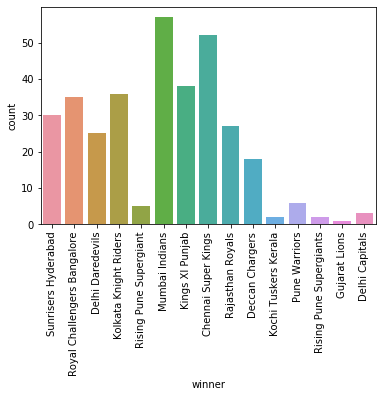

In [9]:
x=match[match['win_by_runs']!=0]
sns.countplot(x['winner'])
plt.xticks(rotation=90)
plt.show()

__Mumbai Indians and Chennai Super King are the best chasing team in the IPL__

## Best target defending team in the IPL

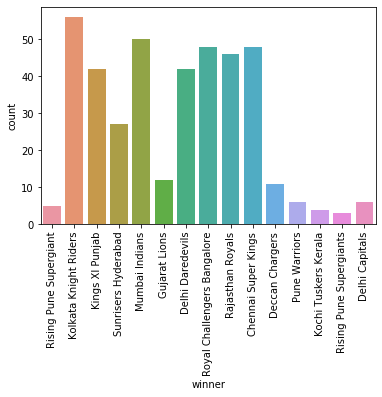

In [10]:
x=match[match['win_by_wickets']!=0]
sns.countplot(x['winner'])
plt.xticks(rotation=90)
plt.show()

__Kolkata Knight Riders is the best defending team in the IPL__

## Match Winning Team

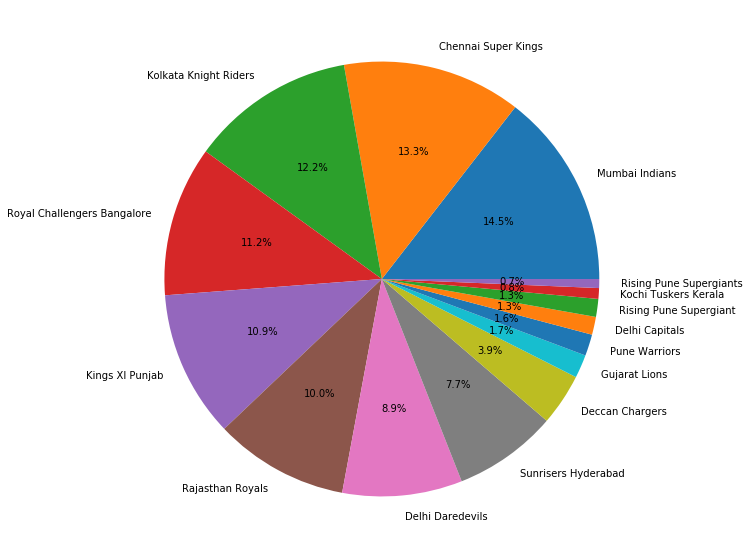

In [11]:
plt.figure(figsize=(10, 10)) 
plt.pie(list(match['winner'].value_counts()),labels=list(match['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

## Match Loss Percentage

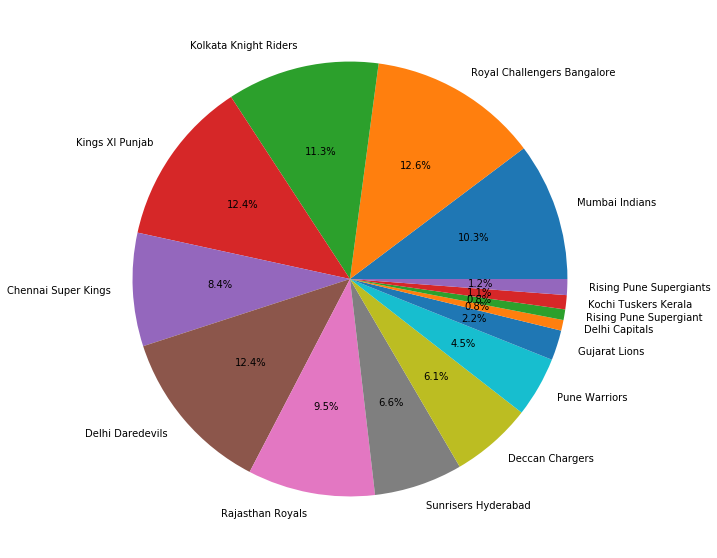

In [12]:
x=pd.concat([match['team1'],match['team2']])
z=x.value_counts()
y=match['winner'].value_counts()
loss_team=[]
loss_value=[]
for i in x.value_counts().index:
    loss_team.append(i)
    loss_value.append(z[i]-y[i])
plt.figure(figsize=(10, 10)) 
plt.pie(loss_value,labels=loss_team,autopct='%0.1f%%')
plt.show()

## Most Successful team in the IPL 

## (1) Chennai Super King

__Win Percantage - 13.3%__

__loss Percantage - 8.4%__

## (2) Mumbai Indians

__Win Percantage - 14.5%__

__loss Percantage - 10.3%__

## Man of the match

Text(0, 0.5, 'Number of the man of the match')

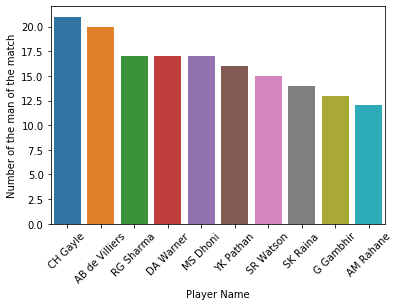

In [13]:
sns.barplot(match['player_of_match'].value_counts()[ :10].index,match['player_of_match'].value_counts()[ :10].values)
plt.xticks(rotation=45)
plt.xlabel("Player Name")
plt.ylabel("Number of the man of the match")

__Chrish Gayle got maximun number of time man of the match award__

## Load Delivery data

In [14]:
delivery=pd.read_csv('deliveries.csv')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Best Batsman

Text(0, 0.5, 'runs')

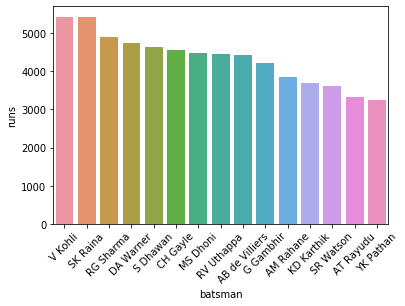

In [16]:
temp=delivery.groupby('batsman')['batsman_runs'].agg('sum').sort_values(ascending=False)
sns.barplot(temp.index[:15],temp.values[0:15])
plt.xticks(rotation=45)
plt.xlabel('batsman')
plt.ylabel('runs')

__Virat Kohli and Suresh Raina__ both are the best batsman in the IPL 

## Best Bowler

Text(0, 0.5, 'over')

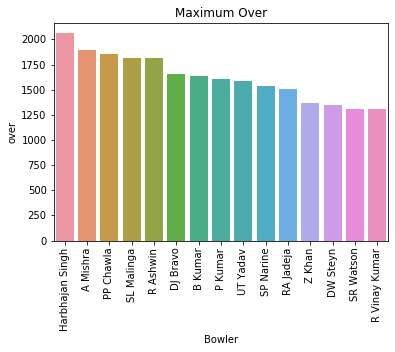

In [17]:
temp=delivery.groupby('bowler')['ball'].agg('sum').sort_values(ascending=False)
sns.barplot(temp.index[:15],temp.values[0:15]/6)
plt.xticks(rotation=90)
plt.title("Maximum Over")
plt.xlabel('Bowler')
plt.ylabel('over')

Text(0, 0.5, 'over')

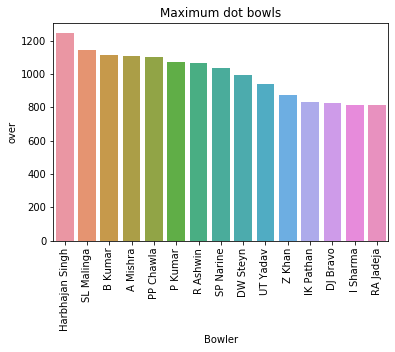

In [18]:
temp=delivery.groupby('bowler')['total_runs'].agg(lambda x:(x==0).sum()).sort_values(ascending=False)
sns.barplot(temp.index[:15],temp.values[0:15])
plt.xticks(rotation=90)
plt.title("Maximum dot bowls")
plt.xlabel('Bowler')
plt.ylabel('over')

__Harbhajan Singh is the best bowler in the IPL__

## Maximum Sixes

Text(0, 0.5, 'runs')

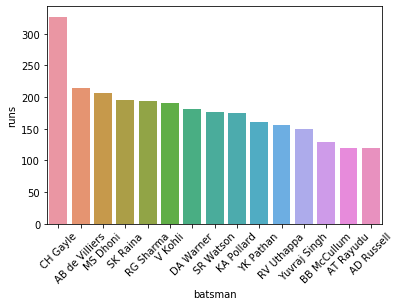

In [19]:
temp=delivery.groupby('batsman')['batsman_runs'].agg(lambda x:(x==6).sum()).sort_values(ascending=False)
sns.barplot(temp.index[:15],temp.values[0:15])
plt.xticks(rotation=45)
plt.xlabel('batsman')
plt.ylabel('runs')

## Suggested teams for company

### 1) Chennai Super King
### 2) Mumbai Indians

## Suggested players for company

### (1) Virat Kholi
### (2) Suresh Raina
### (3) Chrish Gayle
### (4) Harbhajan Singh